### **Video Game Sales Data Analysis**

The analysis's goal is to discover patterns and insights in the sales data of video games, including platform acceptance, genre preferences, publisher success, and global sales trends. Data cleansing, exploratory data analysis, and Python-based data visualization will all part of the analysis. Decisions about which platforms and genres to concentrate on for next game development will be made using the insights acquired from the analysis to guide commercial decisions in the video game industry.

**Business Questions**


1. Which platforms are the most popular for video games?
2. Which genres of games tend to sell the most copies globally?
3. Who are the top publishers of video games, and do certain publishers tend to produce games that sell better than others?
4. Are there any relationships between the sales of games in different regions, such as a correlation between sales in Europe and sales in North America?

**Importing various modules**

For this analysis we will need to import Pandas for exploring our dataset, Seaborn and Matplotlib for visualization

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [ ]:
df = pd.read_csv("Video_Games_Sales.csv") 

In [ ]:
# high-level overview of data shape and composition
print(df.shape,"\n")
print(df.dtypes,"\n")
display(df.head(5))


(16719, 10) 

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
dtype: object 



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# descriptive statistics for numerical values
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# check for percentage of missing values
missing_val_summary = (df.isnull().sum()/df.isnull().count())*100

display(missing_val_summary)


Name               0.011962
Platform           0.000000
Year_of_Release    1.608948
Genre              0.011962
Publisher          0.322986
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
dtype: float64

327

**Structure of our Dataset**

We have 16719 games in our dataset with 10 features(Name,	Platform,	Year_of_Release,	Genre	Publisher,	NA_Sales,	EU_Sales,	JP_Sales,	Other_Sales,	Global_Sales). The columns containing the sales info are only made up of numerical values. 


- All columns had the right datatypes attached to them with the exception of Year_of_Release which is a float. Since we wont use that column in this analysis we will leave it as it is.
- Our data contains no duplicate.
- Missing values were recorded in the following columns: Name, Year_of_Release, Genre, Publisher with the following percentages:

Name: 0.011962

Year_of_Release: 1.608948

Genre: 0.011962

Publisher: 0.322986

- The Year wont be neccesary in this analysis, so after observation, we can see that this percentage of missing data won't affect our analysis so we can move ahead.

### Exploratory Data Analysis

Here we will start working on our business questions

**Question 1: Which platforms are the most popular for video games?**

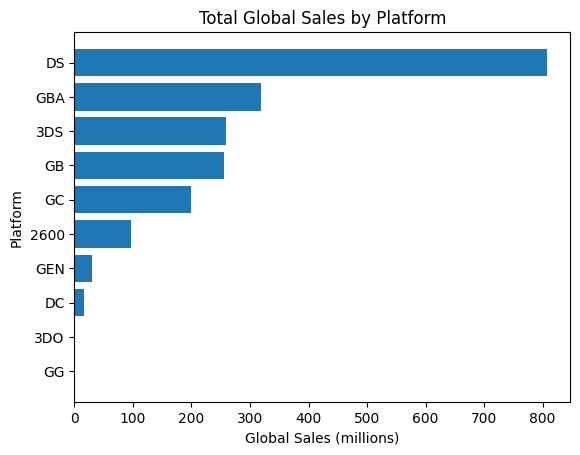

In [ ]:
# Group the data by platform and calculate the total global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the data by global sales in descending order
platform_sales = platform_sales.head(10).sort_values('Global_Sales', ascending=False)

# Plot a horizontal bar chart of the total global sales by platform
plt.barh(platform_sales['Platform'], platform_sales['Global_Sales'])
plt.xlabel('Global Sales (millions)')
plt.ylabel('Platform')
plt.title('Total Global Sales by Platform')
plt.gca().invert_yaxis()
plt.show()

- We could see that **DS** is the most popular platform for video games with over 800M+ in sales globally. 

In other for the visualization to be easily visible by everyone we limited the results of the graph to just the top ten

**Question 2: Which genres of games tend to sell the most copies globally?**

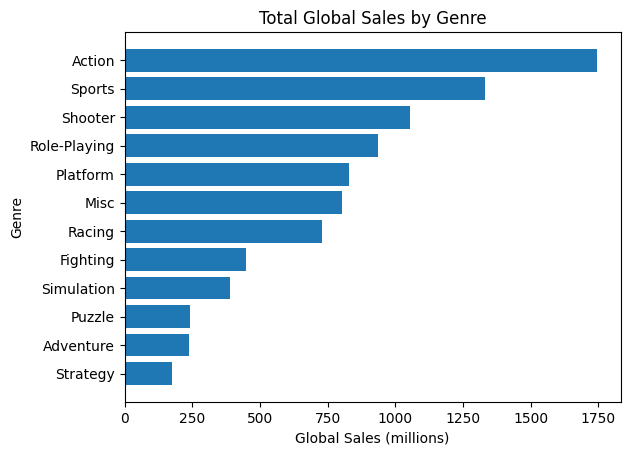

In [ ]:
# Group the data by genre and calculate the total global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the data by global sales in descending order
genre_sales = genre_sales.sort_values('Global_Sales', ascending=False)

# Plot a horizontal bar chart of the total global sales by genre
plt.barh(genre_sales['Genre'], genre_sales['Global_Sales'])
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.title('Total Global Sales by Genre')
plt.gca().invert_yaxis()
plt.show()


- Action games top the list with over 1700M+ sales globally. 

- Action games come with alot of fast-paced, dynamic, unpredictable nature. 

- Another reason why people may buy more action games is because of the adrenaline rush then get from it.

**Question 3: Who are the top publishers of video games, and do certain publishers tend to produce games that sell better than others?**

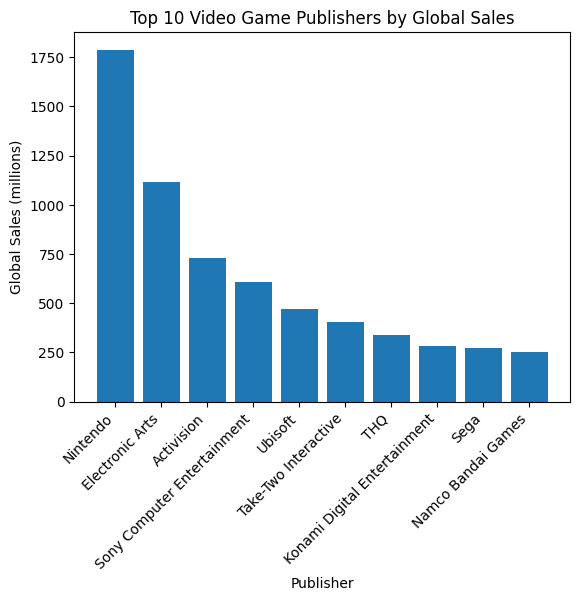

In [ ]:
# Group the data by publisher and calculate the total global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort the data by global sales in descending order
publisher_sales = publisher_sales.sort_values('Global_Sales', ascending=False)

# Plot a bar chart of the top 10 publishers by global sales
top_publishers = publisher_sales.head(10)
plt.bar(top_publishers['Publisher'], top_publishers['Global_Sales'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.title('Top 10 Video Game Publishers by Global Sales')
plt.show()


- This graph shows us that Nintendo is the highest video game publisher.

Another question here is "do certain publishers tend to produce games that sell better than others"? The answer to that is yes. 

Nintendo which is the highest publisher is also the autor of the most commonly used platform which is "DS".

**Question 4: Are there any relationships between the sales of games in different regions, such as a correlation between sales in Europe and sales in North America?**

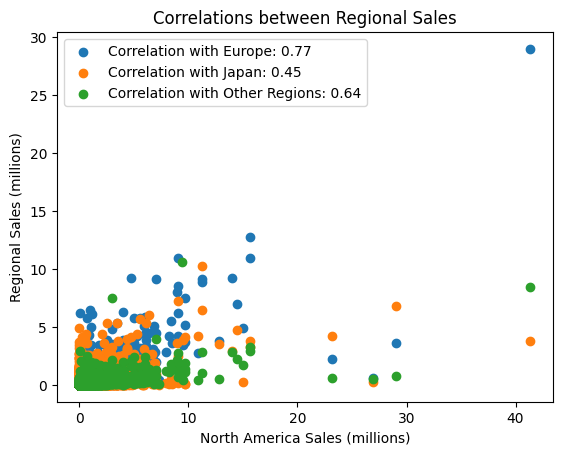

In [ ]:
# Calculate the correlation between sales in North America and sales in Europe
na_eu_corr = df['NA_Sales'].corr(df['EU_Sales'])

# Calculate the correlation between sales in North America and sales in Japan
na_jp_corr = df['NA_Sales'].corr(df['JP_Sales'])

# Calculate the correlation between sales in North America and sales in other regions
na_other_corr = df['NA_Sales'].corr(df['Other_Sales'])

# Plot a scatter plot of the correlations between regional sales
plt.scatter(df['NA_Sales'], df['EU_Sales'], label=f"Correlation with Europe: {na_eu_corr:.2f}")
plt.scatter(df['NA_Sales'], df['JP_Sales'], label=f"Correlation with Japan: {na_jp_corr:.2f}")
plt.scatter(df['NA_Sales'], df['Other_Sales'], label=f"Correlation with Other Regions: {na_other_corr:.2f}")
plt.xlabel('North America Sales (millions)')
plt.ylabel('Regional Sales (millions)')
plt.title('Correlations between Regional Sales')
plt.legend()
plt.show()



The chart above shows the correlations between North America sales and sales in Europe, Japan, and other regions. 

From this chart we can get it that the North American region toped every other region in sales